# API_Eurostat:
* Obtenga los datos para el conjunto de datos `rd_e_berdindr2` de la API de Eurostat para todas las actividades de **NACE** como porcentaje del PIB.

* Lea los datos usando Pandas.
* Calcule el gasto total en todos los países cada año.
* Dibújelo plotearlo.

## Enlaces de ampliación

Listado de databases:
https://ec.europa.eu/eurostat/web/main/data/database

Enlace al database en particular

Visualización: https://ec.europa.eu/eurostat/databrowser/view/rd_e_berdindr2/default/table?lang=en


Metadata general de la carpeta: https://ec.europa.eu/eurostat/cache/metadata/en/rd_esms.htm

Querybuilder:
https://ec.europa.eu/eurostat/web/query-builder/tool

In [32]:
from collections import defaultdict
import requests
import pandas as pd

# Realizar la petición
url = ('https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/rd_e_berdindr2?format=JSON&lang=en&freq=A&nace_r2=TOTAL&nace_r2=D_E&nace_r2=G-N&nace_r2=Q&nace_r2=R&nace_r2=S-U&unit=PC_GDP&geo=EU27_2020&geo=EA20&geo=EA19&geo=BE&geo=BG&geo=CZ&geo=DK&geo=DE&geo=EE&geo=IE&geo=EL&geo=ES&geo=FR&geo=HR&geo=IT&geo=CY&geo=LV&geo=LT&geo=LU&geo=HU&geo=MT&geo=NL&geo=AT&geo=PL&geo=PT&geo=RO&geo=SI&geo=SK&geo=FI&geo=SE&geo=IS&geo=NO&geo=CH&geo=UK&geo=BA&geo=ME&geo=MK&geo=RS&geo=TR&geo=RU&geo=US&geo=CN_X_HK&geo=JP&geo=KR&time=2013&time=2014&time=2015&time=2016&time=2017&time=2018&time=2019&time=2020&time=2021&time=2022')
try:
    respuesta = requests.get(url)
    respuesta.raise_for_status()  # Devuelve un error en caso de error
except:
    print(respuesta.reason)
    raise

In [33]:
# Cambiamos el formato a JSON
datos = respuesta.json()

datos

{'version': '2.0',
 'class': 'dataset',
 'label': 'BERD by NACE Rev. 2 activity',
 'source': 'ESTAT',
 'updated': '2023-12-06T23:00:00+0100',
 'value': {'660': 0.01,
  '662': 0.01,
  '664': 0.01,
  '666': 0.01,
  '668': 0.01,
  '780': 0.01,
  '786': 0.01,
  '787': 0.01,
  '788': 0.01,
  '470': 0.03,
  '471': 0.02,
  '472': 0.02,
  '473': 0.02,
  '474': 0.01,
  '475': 0.03,
  '476': 0.03,
  '477': 0.03,
  '478': 0.03,
  '480': 0,
  '482': 0,
  '483': 0,
  '485': 0,
  '486': 0,
  '487': 0,
  '488': 0,
  '590': 0,
  '591': 0,
  '592': 0,
  '593': 0,
  '594': 0,
  '595': 0,
  '596': 0,
  '597': 0,
  '598': 0,
  '490': 0,
  '491': 0,
  '492': 0.01,
  '493': 0,
  '494': 0,
  '495': 0,
  '496': 0.01,
  '497': 0.01,
  '498': 0.01,
  '499': 0.01,
  '510': 0.01,
  '511': 0.01,
  '512': 0.01,
  '513': 0,
  '514': 0.01,
  '515': 0,
  '516': 0.01,
  '517': 0.01,
  '518': 0.01,
  '500': 0,
  '501': 0,
  '502': 0.01,
  '503': 0.01,
  '504': 0.01,
  '506': 0.01,
  '507': 0.01,
  '520': 0.03,
  '521': 

In [34]:
# Definimos el índices a `datos['dimension']`
indices = pd.MultiIndex.from_product(
    [datos['dimension'][i]['category']['index'] for i in datos['id']]
    , names = datos['id']
)
indices

MultiIndex([('A', 'TOTAL', 'PC_GDP', 'EU27_2020', '2013'),
            ('A', 'TOTAL', 'PC_GDP', 'EU27_2020', '2014'),
            ('A', 'TOTAL', 'PC_GDP', 'EU27_2020', '2015'),
            ('A', 'TOTAL', 'PC_GDP', 'EU27_2020', '2016'),
            ('A', 'TOTAL', 'PC_GDP', 'EU27_2020', '2017'),
            ('A', 'TOTAL', 'PC_GDP', 'EU27_2020', '2018'),
            ('A', 'TOTAL', 'PC_GDP', 'EU27_2020', '2019'),
            ('A', 'TOTAL', 'PC_GDP', 'EU27_2020', '2020'),
            ('A', 'TOTAL', 'PC_GDP', 'EU27_2020', '2021'),
            ('A', 'TOTAL', 'PC_GDP', 'EU27_2020', '2022'),
            ...
            ('A',   'S-U', 'PC_GDP',        'KR', '2013'),
            ('A',   'S-U', 'PC_GDP',        'KR', '2014'),
            ('A',   'S-U', 'PC_GDP',        'KR', '2015'),
            ('A',   'S-U', 'PC_GDP',        'KR', '2016'),
            ('A',   'S-U', 'PC_GDP',        'KR', '2017'),
            ('A',   'S-U', 'PC_GDP',        'KR', '2018'),
            ('A',   'S-U', 'PC_GDP',    

In [35]:
# Rellenamos los huecos sin datos en los indices
tam_indices = len(indices)


In [37]:
# Definimos una función para usarla en las siguientes líneas
def return_none():
    return None

datos_diccionario = defaultdict(return_none, datos['value'])
valores = [datos_diccionario[str(i)] for i in range(tam_indices)]

<Axes: xlabel='time'>

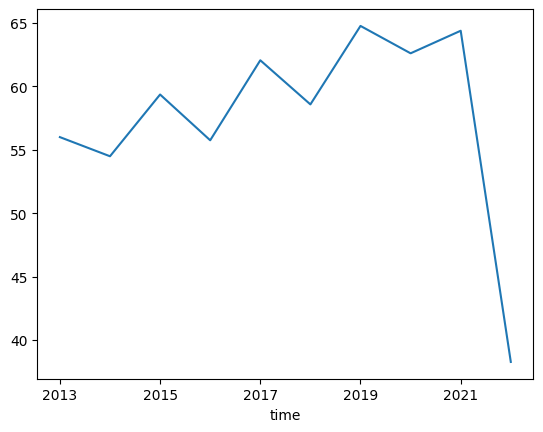

In [38]:
# Lectura, manipulación y gráfica
(pd.DataFrame(valores, index=indices)
    # Quitamos el índice creado anterioprmente
   .unstack('time')
   .droplevel(0, axis=1)
    # Obtener totales
   .sum()
    # Dibujar
   .plot()
)